# Assignment8

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import itertools

%matplotlib inline

In [2]:
df = pd.read_csv("car_data.csv")

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

c:\Users\keyur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Mileage
Feature names seen at fit time, yet now missing:
- Price

  warnings.warn(message, FutureWarning)


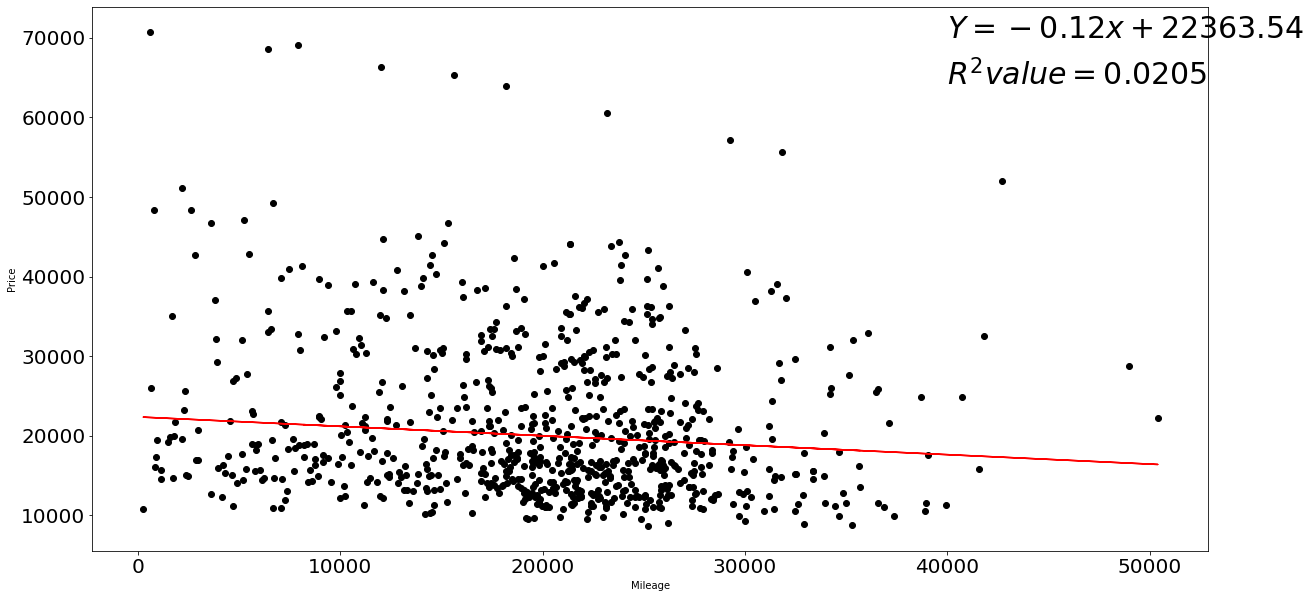

In [3]:
#print(type(df))
#print(df)
xPrice = df[["Price"]]
yMileage = df[["Mileage"]]

linear_regr = LinearRegression()
linear_regr.fit(xPrice, yMileage)
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.scatter(yMileage, xPrice, color='black') 
plt.plot(yMileage, linear_regr.predict(yMileage), color='red')
plt.text(40000, 70000, '$Y = %.2fx + %.2f$' % (linear_regr.coef_, linear_regr.intercept_), fontsize=30)
plt.text(40000, 64000, '$R^2 value = %.4f$'% linear_regr.score(xPrice, yMileage), fontsize=30)
plt.ylabel("Price")
plt.xlabel('Mileage')

plt.show()

In [4]:
print('The R^2 Score of .0205 is not a good.')

The R^2 Score of .0205 is not a good.


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [5]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X = df[features]
y = df[price]

regrtask2 = linear_regr.fit(X, y)

In [6]:
print('R-squared based on Mileage, Cylinder,Liter etc:      ', regrtask2.score(X,y))
print('.44 is also not a strong correlation')

R-squared based on Mileage, Cylinder,Liter etc:       0.4462643536728379
.44 is also not a strong correlation


## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [7]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [8]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']


linear_regr.fit(X, y)

LinearRegression()

In [9]:
print('Intercept:', linear_regr.intercept_)
print('Coefficient:',linear_regr.coef_)
print('Score:', linear_regr.score(X, y))

Intercept: 23983.771909616735
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477


In [10]:
# find the best combination?
combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(features, i))    

In [11]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,y)
            model_score = model.score(x, y)
        if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree

print("The best combination of factors to predict price")
print(degree, maxgroup, check_score)

The best combination of factors to predict price
7 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.9097847608813977
